In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer 

In [3]:
df = pd.read_excel('dataKasus-1.xlsx')

In [4]:
df

,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,RIW HIPERTENSI,RIW PE,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,SOSEK RENDAH,PE/Non PE,Unnamed: 12
0,1,NAMA 1,23 TH,3,< 2 tahun,Tidak,Tidak,Tidak,Ya,Tidak,>UMR,Non PE,NaN
1,2,NAMA 2,29 TH,2,< 2 tahun,Tidak,PEB,Tidak,Tidak,Ada,>UMR,PE,NaN
2,3,NAMA 3,20 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
3,4,NAMA 4,18 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
4,5,NAMA 5,34 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,558,NAMA 557,40 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
557,559,NAMA 558,28 TH,3,< 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
558,560,NAMA 559,41 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
559,561,NAMA 560,32 TH,2,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN


In [5]:
df.head()

,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,RIW HIPERTENSI,RIW PE,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,SOSEK RENDAH,PE/Non PE,Unnamed: 12
0,1,NAMA 1,23 TH,3,< 2 tahun,Tidak,Tidak,Tidak,Ya,Tidak,>UMR,Non PE,NaN
1,2,NAMA 2,29 TH,2,< 2 tahun,Tidak,PEB,Tidak,Tidak,Ada,>UMR,PE,NaN
2,3,NAMA 3,20 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
3,4,NAMA 4,18 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
4,5,NAMA 5,34 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   NO                                561 non-null    int64 
 1   NAMA                              561 non-null    object
 2   USIA                              558 non-null    object
 3   PARITAS                           561 non-null    int64 
 4   JARAK KELAHIRAN                   554 non-null    object
 5   RIW HIPERTENSI                    561 non-null    object
 6   RIW PE                            561 non-null    object
 7   OBESITAS                          561 non-null    object
 8   RIW DM                            561 non-null    object
 9   RIW HIPERTENSI/PE DALAM KELUARGA  561 non-null    object
 10  SOSEK RENDAH                      561 non-null    object
 11  PE/Non PE                         561 non-null    object
 12  Unnamed: 12           

In [7]:
df = df.drop(columns=['Unnamed: 12'])

In [8]:
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   NO                                561 non-null    int64 
 1   NAMA                              561 non-null    object
 2   USIA                              558 non-null    object
 3   PARITAS                           561 non-null    int64 
 4   JARAK KELAHIRAN                   554 non-null    object
 5   RIW HIPERTENSI                    561 non-null    object
 6   RIW PE                            561 non-null    object
 7   OBESITAS                          561 non-null    object
 8   RIW DM                            561 non-null    object
 9   RIW HIPERTENSI/PE DALAM KELUARGA  561 non-null    object
 10  SOSEK RENDAH                      561 non-null    object
 11  PE/Non PE                         561 non-null    object
dtypes: int64(2), object(10

## Mencari Missing Value 

In [9]:
print(df.isnull().sum())

NO                                  0
NAMA                                0
USIA                                3
PARITAS                             0
JARAK KELAHIRAN                     7
RIW HIPERTENSI                      0
RIW PE                              0
OBESITAS                            0
RIW DM                              0
RIW HIPERTENSI/PE DALAM KELUARGA    0
SOSEK RENDAH                        0
PE/Non PE                           0
dtype: int64


In [10]:
value_counts = df['JARAK KELAHIRAN'].astype(str).value_counts(dropna=False)

print(value_counts)

JARAK KELAHIRAN
anak pertama    260
> 2 tahun       211
< 2 tahun        81
nan               7
> 2 tahun         2
Name: count, dtype: int64


In [11]:
imputer = SimpleImputer(strategy='most_frequent')
from sklearn.preprocessing import LabelEncoder

df['JARAK KELAHIRAN'] = imputer.fit_transform(df[['JARAK KELAHIRAN']]).ravel()
df['JARAK KELAHIRAN'] = df['JARAK KELAHIRAN'].replace('> 2 tahun ', '> 2 tahun')

value_counts = df['JARAK KELAHIRAN'].astype(str).value_counts(dropna=False)

print(value_counts)

JARAK KELAHIRAN
anak pertama    267
> 2 tahun       213
< 2 tahun        81
Name: count, dtype: int64


In [12]:
print(df.isnull().sum())

NO                                  0
NAMA                                0
USIA                                3
PARITAS                             0
JARAK KELAHIRAN                     0
RIW HIPERTENSI                      0
RIW PE                              0
OBESITAS                            0
RIW DM                              0
RIW HIPERTENSI/PE DALAM KELUARGA    0
SOSEK RENDAH                        0
PE/Non PE                           0
dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   NO                                561 non-null    int64 
 1   NAMA                              561 non-null    object
 2   USIA                              558 non-null    object
 3   PARITAS                           561 non-null    int64 
 4   JARAK KELAHIRAN                   561 non-null    object
 5   RIW HIPERTENSI                    561 non-null    object
 6   RIW PE                            561 non-null    object
 7   OBESITAS                          561 non-null    object
 8   RIW DM                            561 non-null    object
 9   RIW HIPERTENSI/PE DALAM KELUARGA  561 non-null    object
 10  SOSEK RENDAH                      561 non-null    object
 11  PE/Non PE                         561 non-null    object
dtypes: int64(2), object(10

In [14]:
value_counts = df['USIA'].astype(str).value_counts(dropna=False)

print(value_counts)

USIA
28 TH     28
25 TH     24
31 TH     23
29 TH     22
24 TH     21
          ..
21         1
18 th      1
20 TH      1
23TH       1
14 TH      1
Name: count, Length: 73, dtype: int64


In [15]:
# Menghapus karakter non-numerik dari kolom 'USIA'
df['USIA'] = df['USIA'].str.extract('(\d+)', expand=False)

# Mengubah kolom 'USIA' menjadi numerik
df['USIA'] = pd.to_numeric(df['USIA'], errors='coerce')

# Mengisi nilai NaN dengan rata-rata usia
df['USIA'] = df['USIA'].fillna(df['USIA'].mean())


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\irsya\AppData\Local\Temp\ipykernel_8384\2099429706.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['USIA'] = df['USIA'].str.extract('(\d+)', expand=False)


In [16]:
value_counts = df['USIA'].astype(str).value_counts(dropna=False)

print(value_counts)

USIA
28.0                  41
31.0                  41
25.0                  35
26.0                  35
22.0                  35
29.0                  34
24.0                  33
27.0                  27
23.0                  25
30.0                  25
33.0                  23
21.0                  21
32.0                  20
20.0                  20
36.0                  18
35.0                  17
38.0                  15
34.0                  14
28.195612431444243    14
41.0                  11
39.0                  11
19.0                  10
37.0                   9
40.0                   8
18.0                   5
17.0                   5
15.0                   3
43.0                   2
16.0                   2
13.0                   1
14.0                   1
Name: count, dtype: int64


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NO                                561 non-null    int64  
 1   NAMA                              561 non-null    object 
 2   USIA                              561 non-null    float64
 3   PARITAS                           561 non-null    int64  
 4   JARAK KELAHIRAN                   561 non-null    object 
 5   RIW HIPERTENSI                    561 non-null    object 
 6   RIW PE                            561 non-null    object 
 7   OBESITAS                          561 non-null    object 
 8   RIW DM                            561 non-null    object 
 9   RIW HIPERTENSI/PE DALAM KELUARGA  561 non-null    object 
 10  SOSEK RENDAH                      561 non-null    object 
 11  PE/Non PE                         561 non-null    object 
dtypes: float

In [18]:
value_counts = df['PARITAS'].astype(str).value_counts(dropna=False)
print(value_counts)

PARITAS
1    228
2    186
3     82
0     39
4     20
5      3
6      3
Name: count, dtype: int64


In [19]:
value_counts = df['RIW HIPERTENSI'].astype(str).value_counts(dropna=False)
print(value_counts)


RIW HIPERTENSI
Tidak    508
Ya        53
Name: count, dtype: int64


In [20]:
value_counts = df['RIW PE'].astype(str).value_counts(dropna=False)
print(value_counts)


RIW PE
Tidak                     526
PEB                        19
PE                          6
Impending PE                2
HELLP SYNDROM               2
Impending Eklamsia          1
Kejang Konvulsi             1
impending eklamsia          1
PE, HELLP Syndrome          1
PEB impending eklampsi      1
Impending Ekalmsia          1
Name: count, dtype: int64


In [21]:
df['RIW PE'] = df['RIW PE'].replace(to_replace=['PEB', 'PE', 'HELLP SYNDROM', 'Impending PE', 'Impending Eklamsia', 'PE, HELLP Syndrome', 'PEB impending eklampsi', 'Impending Ekalmsia', 'Kejang Konvulsi', 'impending eklamsia'],
    value='Ada')

value_counts = df['RIW PE'].astype(str).value_counts(dropna=False)
print(value_counts)

RIW PE
Tidak    526
Ada       35
Name: count, dtype: int64


In [22]:
value_counts = df['OBESITAS'].astype(str).value_counts(dropna=False)

print(value_counts)

OBESITAS
Tidak    556
Ya         5
Name: count, dtype: int64


In [23]:
value_counts = df['RIW DM'].astype(str).value_counts(dropna=False)

print(value_counts)

RIW DM
Tidak    556
Ya         5
Name: count, dtype: int64


In [24]:
value_counts = df['RIW HIPERTENSI/PE DALAM KELUARGA'].astype(str).value_counts(dropna=False)

print(value_counts)

RIW HIPERTENSI/PE DALAM KELUARGA
Tidak    550
Ada       11
Name: count, dtype: int64


In [32]:
value_counts = df['SOSEK RENDAH'].astype(str).value_counts(dropna=False)

print(value_counts)

SOSEK RENDAH
>UMR    557
<UMR      4
Name: count, dtype: int64


In [31]:
value_counts = df['PE/Non PE'].astype(str).value_counts(dropna=False)

print(value_counts)

PE/Non PE
Non PE                    520
PEB                        20
PE                         18
Eklamsia                    1
PE gemelli                  1
PEB impending eklampsi      1
Name: count, dtype: int64


In [27]:
print(df['PE/Non PE'].unique())

['Non PE' 'PE' 'PEB' 'Eklamsia' 'PE gemelli' 'PEB impending eklampsi'
 'PE ']


In [33]:
df['PE/Non PE'] = df['PE/Non PE'].replace(to_replace=['PE', 'PEB', 'Eklamsia' ,'PE gemelli',  'PEB impending eklampsi', 'PE '], value='PE')

In [34]:
value_counts = df['PE/Non PE'].astype(str).value_counts(dropna=False)

print(value_counts)

PE/Non PE
Non PE    520
PE         41
Name: count, dtype: int64


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NO                                561 non-null    int64  
 1   NAMA                              561 non-null    object 
 2   USIA                              561 non-null    float64
 3   PARITAS                           561 non-null    int64  
 4   JARAK KELAHIRAN                   561 non-null    object 
 5   RIW HIPERTENSI                    561 non-null    object 
 6   RIW PE                            561 non-null    object 
 7   OBESITAS                          561 non-null    object 
 8   RIW DM                            561 non-null    object 
 9   RIW HIPERTENSI/PE DALAM KELUARGA  561 non-null    object 
 10  SOSEK RENDAH                      561 non-null    object 
 11  PE/Non PE                         561 non-null    object 
dtypes: float

## Konversi Ke Numeric

In [75]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Mengubah kolom 'JARAK KELAHIRAN' menjadi bentuk numerik
df['JARAK KELAHIRAN'] = label_encoder.fit_transform(df['JARAK KELAHIRAN'])

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NO                                561 non-null    int64  
 1   NAMA                              561 non-null    object 
 2   USIA                              561 non-null    float64
 3   PARITAS                           561 non-null    int64  
 4   JARAK KELAHIRAN                   561 non-null    int64  
 5   RIW HIPERTENSI/PE DALAM KELUARGA  561 non-null    object 
 6   SOSEK RENDAH                      561 non-null    object 
 7   PE/Non PE                         561 non-null    object 
 8   RIW HIPERTENSI_Tidak              561 non-null    float64
 9   RIW HIPERTENSI_Ya                 561 non-null    float64
 10  RIW PE_Ada                        561 non-null    float64
 11  RIW PE_Tidak                      561 non-null    float64
 12  OBESITAS

In [77]:
value_counts = df['JARAK KELAHIRAN'].astype(str).value_counts(dropna=False)

print(value_counts)

JARAK KELAHIRAN
2    267
1    213
0     81
Name: count, dtype: int64


In [78]:
from sklearn.preprocessing import OneHotEncoder 

In [70]:
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[['RIW HIPERTENSI']])

one_hot_columns = encoder.get_feature_names_out(['RIW HIPERTENSI'])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

df = pd.concat([df.drop('RIW HIPERTENSI', axis=1), one_hot_df], axis=1)

KeyError: "None of [Index(['RIW HIPERTENSI'], dtype='object')] are in the [columns]"

In [71]:
df.head()

,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,RIW PE,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,SOSEK RENDAH,PE/Non PE,RIW HIPERTENSI_Tidak,RIW HIPERTENSI_Ya
0,1,NAMA 1,23.0,3,0,Tidak,Tidak,Ya,Tidak,>UMR,Non PE,1.0,0.0
1,2,NAMA 2,29.0,2,0,Ada,Tidak,Tidak,Ada,>UMR,PE,1.0,0.0
2,3,NAMA 3,20.0,1,2,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,1.0,0.0
3,4,NAMA 4,18.0,1,2,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,1.0,0.0
4,5,NAMA 5,34.0,3,1,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,1.0,0.0


In [69]:
df[['RIW HIPERTENSI_Tidak']]

,RIW HIPERTENSI_Tidak
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
556,1.0
557,1.0
558,1.0
559,1.0


In [72]:
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[['RIW PE']])

one_hot_columns = encoder.get_feature_names_out(['RIW PE'])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

df = pd.concat([df.drop('RIW PE', axis=1), one_hot_df], axis=1)

In [73]:
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[['OBESITAS']])

one_hot_columns = encoder.get_feature_names_out(['OBESITAS'])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

df = pd.concat([df.drop('OBESITAS', axis=1), one_hot_df], axis=1)

In [74]:
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[['RIW DM']])

one_hot_columns = encoder.get_feature_names_out(['RIW DM'])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

df = pd.concat([df.drop('RIW DM', axis=1), one_hot_df], axis=1)

In [79]:
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[['RIW HIPERTENSI/PE DALAM KELUARGA']])

one_hot_columns = encoder.get_feature_names_out(['RIW HIPERTENSI/PE DALAM KELUARGA'])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

df = pd.concat([df.drop('RIW HIPERTENSI/PE DALAM KELUARGA', axis=1), one_hot_df], axis=1)

In [80]:
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[['SOSEK RENDAH']])

one_hot_columns = encoder.get_feature_names_out(['SOSEK RENDAH'])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

df = pd.concat([df.drop('SOSEK RENDAH', axis=1), one_hot_df], axis=1)

In [82]:
df['PE/Non PE'] = label_encoder.fit_transform(df['PE/Non PE'])

In [83]:
df.head()

,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,PE/Non PE,RIW HIPERTENSI_Tidak,RIW HIPERTENSI_Ya,RIW PE_Ada,RIW PE_Tidak,OBESITAS_Tidak,OBESITAS_Ya,RIW DM_Tidak,RIW DM_Ya,RIW HIPERTENSI/PE DALAM KELUARGA_Ada,RIW HIPERTENSI/PE DALAM KELUARGA_Tidak,SOSEK RENDAH_<UMR,SOSEK RENDAH_>UMR
0,1,NAMA 1,23.0,3,0,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,2,NAMA 2,29.0,2,0,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,3,NAMA 3,20.0,1,2,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,4,NAMA 4,18.0,1,2,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,5,NAMA 5,34.0,3,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NO                                      561 non-null    int64  
 1   NAMA                                    561 non-null    object 
 2   USIA                                    561 non-null    float64
 3   PARITAS                                 561 non-null    int64  
 4   JARAK KELAHIRAN                         561 non-null    int64  
 5   PE/Non PE                               561 non-null    int64  
 6   RIW HIPERTENSI_Tidak                    561 non-null    float64
 7   RIW HIPERTENSI_Ya                       561 non-null    float64
 8   RIW PE_Ada                              561 non-null    float64
 9   RIW PE_Tidak                            561 non-null    float64
 10  OBESITAS_Tidak                          561 non-null    float6

In [85]:
df

,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,PE/Non PE,RIW HIPERTENSI_Tidak,RIW HIPERTENSI_Ya,RIW PE_Ada,RIW PE_Tidak,OBESITAS_Tidak,OBESITAS_Ya,RIW DM_Tidak,RIW DM_Ya,RIW HIPERTENSI/PE DALAM KELUARGA_Ada,RIW HIPERTENSI/PE DALAM KELUARGA_Tidak,SOSEK RENDAH_<UMR,SOSEK RENDAH_>UMR
0,1,NAMA 1,23.0,3,0,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,2,NAMA 2,29.0,2,0,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,3,NAMA 3,20.0,1,2,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,4,NAMA 4,18.0,1,2,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,5,NAMA 5,34.0,3,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,558,NAMA 557,40.0,3,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
557,559,NAMA 558,28.0,3,0,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
558,560,NAMA 559,41.0,3,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
559,561,NAMA 560,32.0,2,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


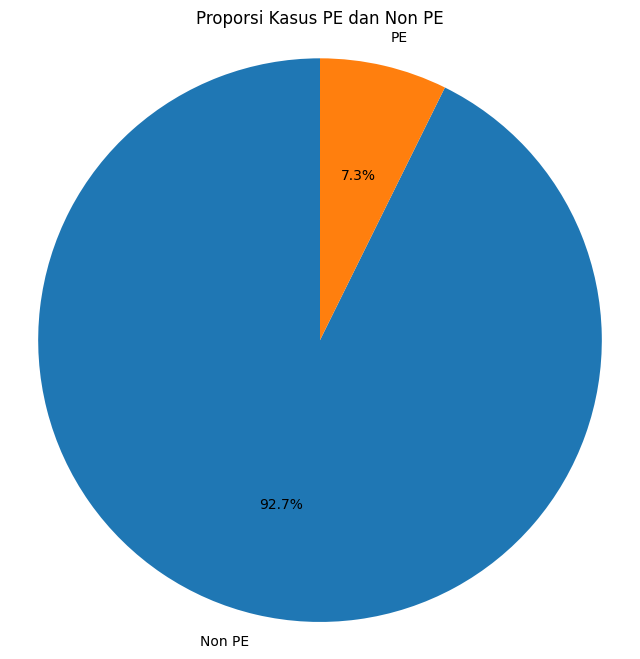

In [87]:
# Hitung jumlah masing-masing kategori
pie_counts = df['PE/Non PE'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(pie_counts, labels=['Non PE', 'PE'], autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Kasus PE dan Non PE')
plt.axis('equal')  # Agar pie chart berbentuk bulat
plt.show()
